## Q1. What is the mathematical formula for a linear SVM?


- The decision function for a linear SVM is given by:  f(x)=sign(w⋅x+b), where w is the weight vector, x is the input feature vector, and b is the bias term.

***

## Q2. What is the objective function of a linear SVM?

- The objective function aims to maximize the margin between two classes while minimizing the classification error. 

***


## Q3. What is the kernel trick in SVM?

- The kernel trick allows SVMs to handle non-linearly separable data by implicitly mapping it to a higher-dimensional space. This is done without explicitly calculating the transformation. Common kernels include polynomial, radial basis function (RBF), and sigmoid.

***


## Q4. What is the role of support vectors in SVM Explain with example

- Support vectors are data points that have a non-zero weight in the determination of the decision boundary. They are crucial in defining the optimal hyperplane, as their removal would alter the position of the hyperplane. SVMs are often sparse, and most of the training points do not contribute to the decision function.

***


## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

- A Hyperplane is the decision boundary that separates two classes.
- A Marginal Plane is the parallel planes that are equidistant from the hyperplane.
- A Hard Margin SVM has no allowance for misclassification, and the data points must be correctly classified.
- A Soft Margin SVM allows for some misclassification to achieve a more generalizable model.

***


## Q6. SVM Implementation through Iris dataset.


#### Load the iris dataset from the scikit-learn library and split it into a training set and a testing set 1

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dibya\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [43]:
pip install seaborn


  Using cached pandas-2.1.4-cp39-cp39-win_amd64.whl (10.8 MB)


You should consider upgrading via the 'c:\Users\dibya\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='0', ylabel='1'>

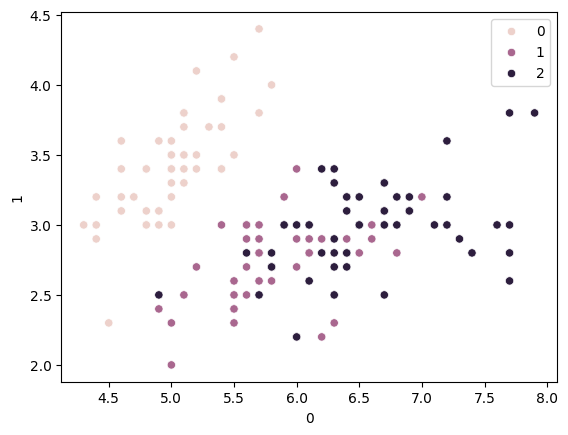

In [45]:
import seaborn as sns
import pandas as pd


sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)



#### Train a linear SVM classifier on the training set and predict the labels for the testing setl

In [46]:
# Create a linear SVM classifier with a default C value (1.0)
clf = SVC(kernel='linear')

# Train the classifier on the training set
clf.fit(X_train, y_train)

SVC(kernel='linear')


#### Compute the accuracy of the model on the testing setl

In [47]:
# Predict on the testing set
y_pred = clf.predict(X_test)

In [48]:
# Compute the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




#### Plot the decision boundaries of the trained model using two of the featuresl

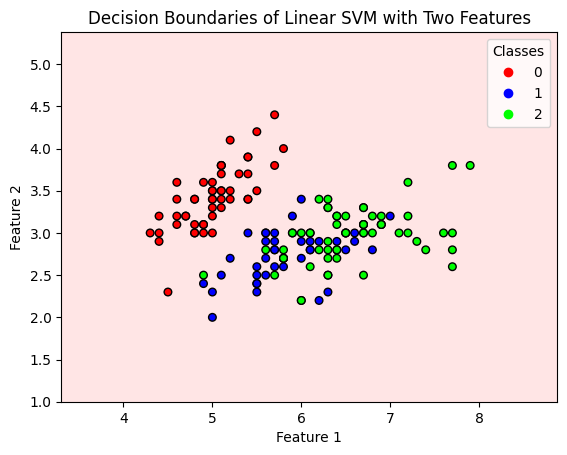

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Extract all four features for visualization
X_visualize = X

# Plot the decision boundaries
h = .02  # step size in the mesh

# Create a meshgrid of feature values
x_min, x_max = X_visualize[:, 0].min() - 1, X_visualize[:, 0].max() + 1
y_min, y_max = X_visualize[:, 1].min() - 1, X_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain the decision boundary predictions
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

# Plot the training points
scatter = plt.scatter(X_visualize[:, 0], X_visualize[:, 1], c=y, cmap=cmap_points, edgecolors='k', s=30)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of Linear SVM with Two Features')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title='Classes')

# Show the plot
plt.show()



#### Try different values of the regularisation parameter C and see how it affects the performance of the model.


In [55]:
# Define a range of C values to try
from sklearn.model_selection import GridSearchCV

## defining parameter range
parameter = {
    "C": [0.1, 1, 10, 100, 1000]
}

In [57]:
grid = GridSearchCV(SVC(), param_grid=parameter, cv = 5, refit=True, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.958 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.750 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.917 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.958 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.875 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.958 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.833 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.958 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=1.000 total time=   0.0s
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [58]:
grid.best_params_


{'C': 1}

In [60]:
svc = SVC(kernel="linear", C=1)
svc.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [62]:
y_pred = svc.predict(X_test)


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




## Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

In [64]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.num_epochs):
            # Compute hinge loss and gradients
            scores = np.dot(X, self.weights) + self.bias
            margins = 1 - y * scores
            loss = np.maximum(0, margins).mean()
            grad_weights = (X.T.dot((margins > 0) * -y) + self.lambda_param * self.weights) / num_samples
            grad_bias = np.sum((margins > 0) * -y) / num_samples

            # Update weights and bias
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.num_epochs}, Loss: {loss}')

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        return np.sign(scores)

In [65]:
# Linear SVM from scratch
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train)
predictions_scratch = svm_scratch.predict(X_test)

Epoch 0/1000, Loss: 1.0
Epoch 100/1000, Loss: 0.3333333333333333
Epoch 200/1000, Loss: 0.3333333333333333
Epoch 300/1000, Loss: 0.3333333333333333
Epoch 400/1000, Loss: 0.3333333333333333
Epoch 500/1000, Loss: 0.3333333333333333
Epoch 600/1000, Loss: 0.3333333333333333
Epoch 700/1000, Loss: 0.3333333333333333
Epoch 800/1000, Loss: 0.3333333333333333
Epoch 900/1000, Loss: 0.3333333333333333


In [66]:
# Linear SVM using scikit-learn
from sklearn.svm import SVC
svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)
predictions_sklearn = svm_sklearn.predict(X_test)

In [67]:
# Compare performance
from sklearn.metrics import accuracy_score
accuracy_scratch = accuracy_score(y_test, predictions_scratch)
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)

print(f'Accuracy (scratch): {accuracy_scratch}')
print(f'Accuracy (scikit-learn): {accuracy_sklearn}')

Accuracy (scratch): 0.3
Accuracy (scikit-learn): 1.0
